In [22]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import Bunch

%matplotlib inline
from skimage.io import imread
from skimage.transform import resize

In [25]:
# load image in structure directory like it's sklearn sample dataset
def load_image_files(container_path,dimension=(64,64)):

    image_dir=Path(container_path)
    folders=[directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories=[fo.name for fo in folders]
    print(categories)
    descr = """description: image classification """

    images=[]
    flat_data=[]
    target=[]
    #print(target)

    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img=imread(file)
            #plt.imshow(img)#original images we have to converting image
            #plt.show()
            img_resized=resize(img,dimension,anti_aliasing=True,mode='reflect')
            plt.imshow(img_resized)#after converting the image
            #plt.show()
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data=np.array(flat_data)
    target=np.array(target)
    images=np.array(images)
        
    return Bunch(data=flat_data,
                    target=target,
                    target_names=categories,
                    images=images,
                    DESCR=descr)

In [26]:
#data = load_image_files("/home/manikanta/Documents/ML/classification/KNN/image/")

['dog', 'flowers', 'cat']


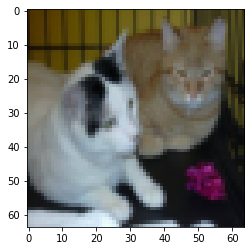

In [27]:
import skimage
image_dataset=load_image_files("/home/manikanta/Documents/ML/classification/KNN/image")

In [28]:
print(image_dataset.DESCR)

description: image classification 


In [29]:
image_dataset.images[0].shape

(64, 64, 3)

In [30]:
image_dataset.data[0:5]

array([[0.25257353, 0.68002451, 0.6564951 , ..., 0.64770508, 0.6382688 ,
        0.5372549 ],
       [0.28400735, 0.31145833, 0.14515931, ..., 0.82359069, 0.81047986,
        0.75851716],
       [0.31244638, 0.20264246, 0.15558364, ..., 0.44339001, 0.30272672,
        0.20174632],
       [0.61081495, 0.58159371, 0.50655637, ..., 0.52313783, 0.79433211,
        0.92291667],
       [0.82318977, 0.79966036, 0.81534663, ..., 0.54117384, 0.38363971,
        0.40324755]])

In [31]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
image_dataset.target_names

['dog', 'flowers', 'cat']

# split Data

In [ ]:
# KNN  algorithm

In [101]:
from sklearn.model_selection import train_test_split
x_trine,x_test,y_trine,y_test=train_test_split(image_dataset.data,image_dataset.target,test_size=0.20,random_state=10)

In [102]:
x_trine.shape

(132, 12288)

In [103]:
x_test.shape

(33, 12288)

In [104]:
y_trine.shape

(132,)

In [105]:
y_test.shape

(33,)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
#Trining the model using the trining set
model.fit(x_trine,y_trine)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [107]:
model.classes_

array([0, 1, 2])

In [108]:
trine_score=model.score(x_trine,y_trine)
trine_score

0.8257575757575758

In [109]:
test_score=model.score(x_test,y_test)
test_score

0.7878787878787878

In [118]:
#predicting the fruits
predicted=model.predict(x_test)
print(predicted)

[1 1 1 0 1 1 1 0 1 1 0 0 2 0 1 2 0 2 1 1 0 0 1 2 0 0 0 1 0 1 1 1 0 1 2 0 2
 0 1 2 2 1]


In [119]:
y_test

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1])

In [120]:
df=pd.DataFrame({'New_predict':predicted,'actual_data':y_test})
print(df)

    New_predict  actual_data
0             1            0
1             1            1
2             1            1
3             0            0
4             1            1
5             1            1
6             1            1
7             0            1
8             1            1
9             1            1
10            0            2
11            0            0
12            2            2
13            0            0
14            1            1
15            2            2
16            0            1
17            2            1
18            1            1
19            1            1
20            0            0
21            0            0
22            1            1
23            2            0
24            0            0
25            0            0
26            0            0
27            1            1
28            0            0
29            1            1
30            1            1
31            1            1
32            0            2
33            

In [ ]:
# Logistic algorithm

In [112]:
x_trine,x_test,y_trine,y_test=train_test_split(image_dataset.data,image_dataset.target,test_size=0.25,random_state=10)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
solver=['liblinear','newton-cg','lbfgs','sag','saga']

In [115]:
for i in solver:
    model=LogisticRegression(solver=i,max_iter=10000)
    model.fit(x_trine,y_trine)
    predicted=model.predict(x_test)
    print('slover is this',i)
    print('traine score ',model.score(x_trine,y_trine))
    print('test score ',model.score(x_test,y_test))
    df=pd.DataFrame({'New_predict':predicted,'actual_data':y_test})
    
    print(df)

slover is this liblinear
traine score  1.0
test score  0.7619047619047619
    New_predict  actual_data
0             1            0
1             1            1
2             1            1
3             0            0
4             1            1
5             1            1
6             1            1
7             0            1
8             1            1
9             1            1
10            0            2
11            0            0
12            2            2
13            0            0
14            1            1
15            2            2
16            0            1
17            2            1
18            1            1
19            1            1
20            2            0
21            0            0
22            1            1
23            2            0
24            0            0
25            0            0
26            0            0
27            1            1
28            0            0
29            1            1
30            1            